<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/02_Unsupervised_learning/04_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA - Principal Component Analysis
PCA (Principal Component Analysis) is a way to reduce the number of features in your dataset while keeping as much useful variation as possible.


> Finding new axes (directions/Principal components) in the data where the spread is largest, and then representing your data in those directions instead of the original ones.

## Working of PCA
- PCA works by first standardizing the dataset so all features are on the same scale
- Then calculating the covariance matrix to understand how features vary together.
- From this matrix, we find eigenvectors (directions of maximum variance) and their corresponding eigenvalues (amount of variance captured).
- We then sort these components by descending eigenvalues, choose the top few that retain most of the variance.
- Finally project the original data onto these new axes to obtain a reduced set of features that preserves as much useful information as possible.

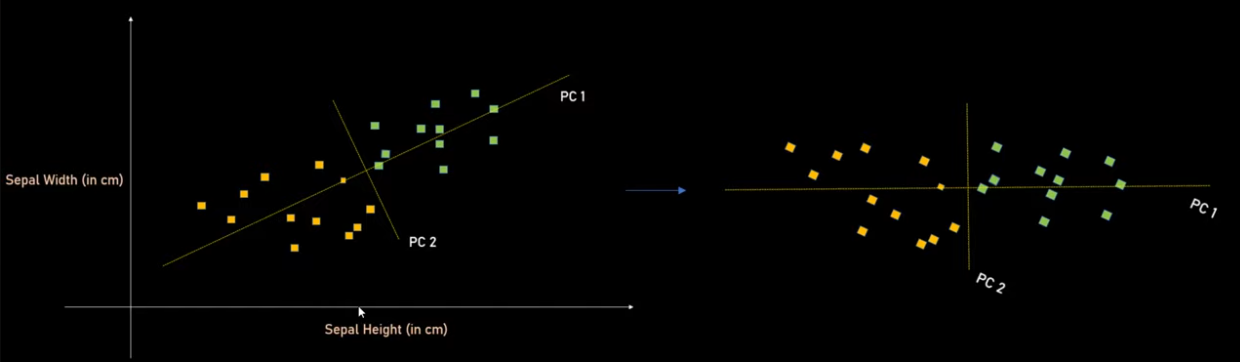

In this notebook we will use PCA on handwritten digits dataset

In [43]:
from sklearn.datasets import load_digits
import pandas as pd

dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

<Figure size 640x480 with 0 Axes>

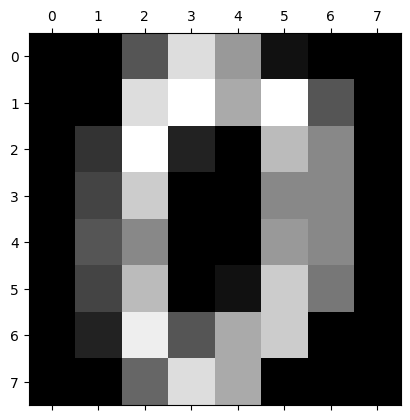

In [44]:
from matplotlib import pyplot as plt

plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

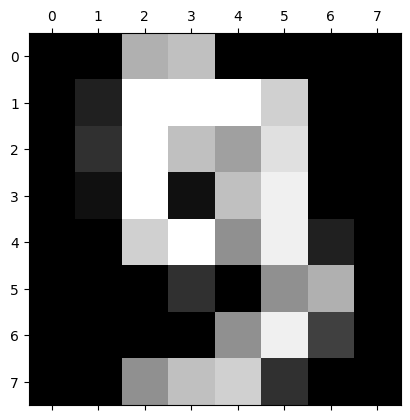

In [45]:
plt.matshow(dataset.data[9].reshape(8,8))

In [46]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names) #8*8=64 features
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [47]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [48]:
X = df
y = dataset.target

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

Use PCA to reduce dimensions

In [52]:
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

Use components such that 95% of variance is retained

In [53]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 40)

In [54]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 , 0.01271931, 0.01165837, 0.01057647, 0.00975316,
       0.00944559, 0.00863014, 0.00836643, 0.00797693, 0.00746471,
       0.00725582, 0.00691911, 0.00653909, 0.00640793, 0.00591384,
       0.00571162, 0.00523637, 0.00481808, 0.00453719, 0.00423163])

In [55]:
pca.n_components_

np.int64(40)

PCA created 40 components out of 64 original columns

In [56]:
X_pca

array([[-1.91421366, -0.95450157, -3.94603482, ...,  0.81405925,
         0.0249306 , -0.32193146],
       [-0.58898033,  0.9246358 ,  3.92475494, ...,  0.20026094,
         0.08710843,  0.48914299],
       [-1.30203906, -0.31718883,  3.02333293, ..., -0.214596  ,
        -1.2788745 , -0.54583387],
       ...,
       [-1.02259599, -0.14791087,  2.46997365, ...,  0.60136463,
         0.41238798, -1.20886377],
       [-1.07605522, -0.38090625, -2.45548693, ...,  0.43756556,
        -0.69863483,  0.44339963],
       [ 1.25770233, -2.22759088,  0.28362789, ..., -0.38108638,
         0.12855104, -1.32137195]])

In [57]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9638888888888889

Let's now select only two components

In [59]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 2)

In [60]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

You can see that both combined retains 0.12+0.09=0.27 or 21% of important feature information

In [61]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.5666666666666667

We get less accuancy (~56%) as using only 2 components did not retain much of the feature information. However in real life you will find many cases where using 2 or few PCA components can still give you a pretty good accuracy